# Linear Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Get the training data

dfx = pd.read_csv(r'C:\Users\abhay verma\Downloads/linearX.csv')
dfy = pd.read_csv(r'C:\Users\abhay verma\Downloads/linearY.csv')

dfx = dfx.values
dfy = dfy.values

x = dfx.reshape((-1,))
y = dfy.reshape((-1,))
print(x.shape)
print(y.shape)
print(x)

(99,)
(99,)
[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]


## Visualise and Preprocess

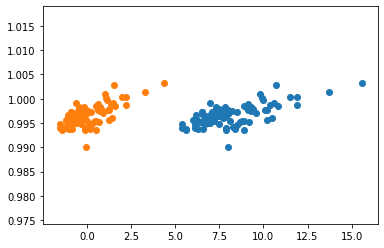

In [16]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

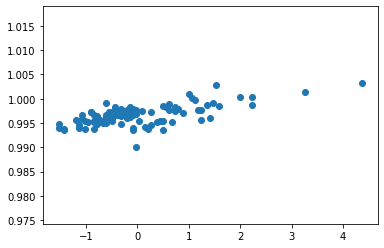

In [18]:
plt.scatter(X,Y)
plt.show()

# Gradient Descent Algorithm

# start with a random theta

In [19]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [22]:
def error(x,y,theta):
    error = 0
    for i in range(x.shape[0]):
         hx = hypothesis(x[i],theta)
         error += (hx-y[i])**2
        
    return error

In [23]:
def gradient(x,y,theta):
    
    grad = np.zeros((2,))
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        grad[0] +=  (hx-y[i])
        grad[1] += (hx-y[i])*X[i] 
     
    return grad
        

In [24]:
#Algorithm
def gradientDescent(x,y,learning_rate=0.001):
    
    # random theta
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list


In [25]:
final_theta, error_list,theta_list = gradientDescent(x,y)

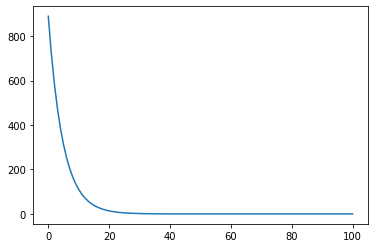

In [26]:
plt.plot(error_list)
plt.show()

In [27]:
print(final_theta)

[9.90229462e-01 7.85559341e-04]


In [28]:
### Plot the line for testing data

xtest = np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


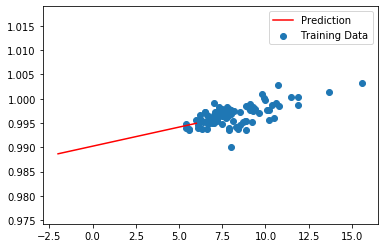

In [30]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='red',label="Prediction")
plt.legend()
plt.show()